<a href="https://colab.research.google.com/github/Julian6262/the_founder/blob/main/home%20work%2015/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. [Распознание рукописных цифр (Практика)](https://colab.research.google.com/drive/1RaGkCutdIazFN5PtQOod5UH2Cc05diYI)
3. Домашняя работа

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,0:784]
Y = dataset[:,0]

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2)

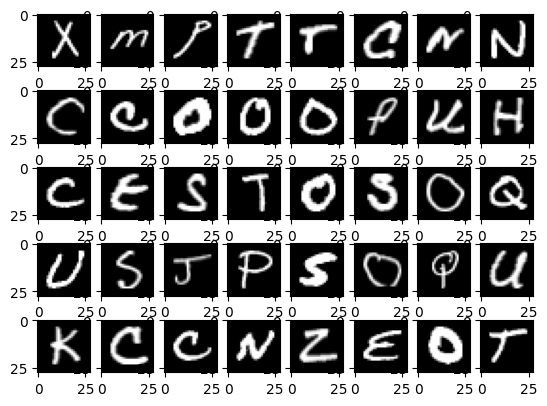

In [ ]:
for i in range(40):

    x = x_train[i]
    x = x.reshape((28, 28))
    im = plt.subplot(5, 8, i+1)
    im.imshow(x, cmap='gray')

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=512)

Epoch 1/10
582/582 [==============================] - 4s 6ms/step - loss: 0.4103 - accuracy: 0.8914 - val_loss: 0.1893 - val_accuracy: 0.9507
Epoch 2/10
582/582 [==============================] - 3s 5ms/step - loss: 0.1473 - accuracy: 0.9611 - val_loss: 0.1249 - val_accuracy: 0.9670
Epoch 3/10
582/582 [==============================] - 3s 6ms/step - loss: 0.0999 - accuracy: 0.9738 - val_loss: 0.0948 - val_accuracy: 0.9751
Epoch 4/10
582/582 [==============================] - 3s 5ms/step - loss: 0.0760 - accuracy: 0.9798 - val_loss: 0.0767 - val_accuracy: 0.9797
Epoch 5/10
582/582 [==============================] - 3s 5ms/step - loss: 0.0583 - accuracy: 0.9848 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 6/10
582/582 [==============================] - 3s 4ms/step - loss: 0.0456 - accuracy: 0.9882 - val_loss: 0.0570 - val_accuracy: 0.9844
Epoch 7/10
582/582 [==============================] - 4s 7ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.0532 - val_accuracy: 0.9857
Epoch 

In [ ]:
history_dict = history.history

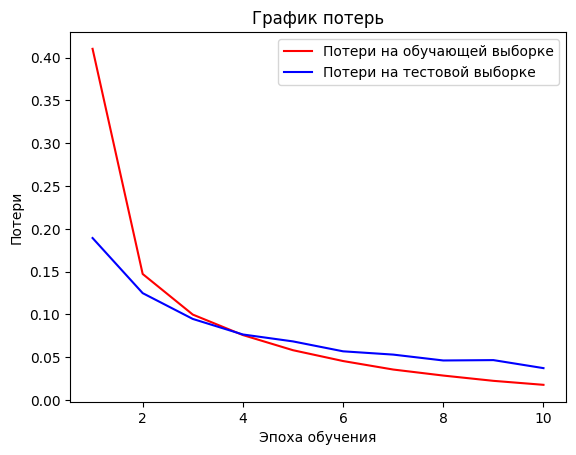

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

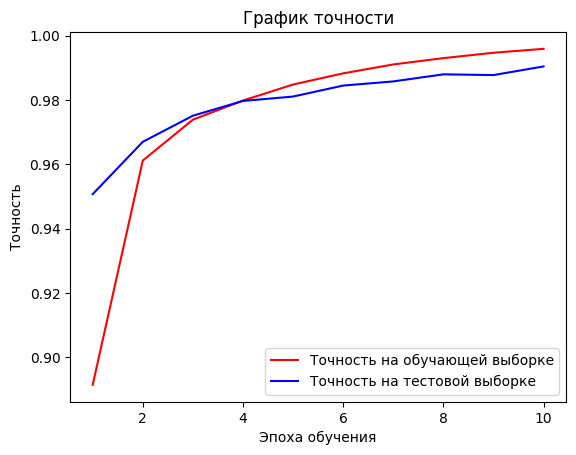

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'r', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 [==============================] - 6s 2ms/step - loss: 0.0373 - accuracy: 0.9904
Точность на тестовом образце: 0.9903880953788757
Потери на тестовом образце: 0.0373481884598732


**Точность на тестовой выборке 99% - ниже представлены предсказания по тестовой выборке, все из них верны. Сеть хорошо распознает рукописные буквы**

In [ ]:
table = { 0 : "a", 1 : "b", 2 : "c", 3 : "d", 4 : "e", 5 : "f", 6 : "g",
         7 : "h", 8 : "i", 9 : "j", 10 : "k", 11 : "l", 12 : "m", 13 : "n",
          14 : "o", 15 : "p", 16 : "q", 17 : "r", 18 : "s", 19 : "t", 20 : "u",
          21 : "v", 22 : "w", 23 : "x", 24 : "y", 25 : "z"}

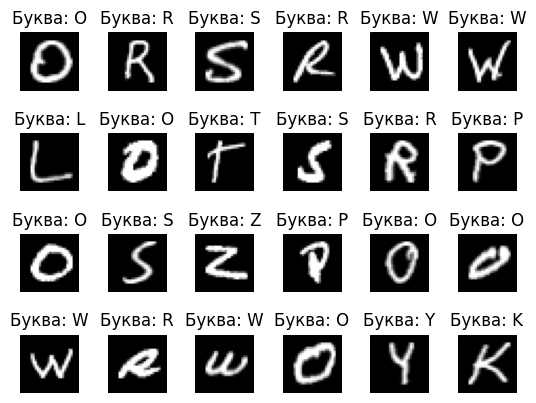

In [ ]:
# # Показать первые 24ть предсказаний из тестовой выборки
for i in range(24):
    x = x_test[i]
    expand_x = np.expand_dims(x, axis=0)

    pred = model.predict(expand_x, verbose=False)
    pred = np.argmax(pred)

    x = x.reshape((28, 28))
    plt.subplot(4,6,1+i)
    plt.axis('off')
    plt.imshow(x, cmap='gray')
    plt.title(f"Буква: {table[pred].upper()}")
    plt.subplots_adjust(hspace=.5, wspace=.5)